<a href="https://colab.research.google.com/github/scubasloth/MLF_1a/blob/main/W4_InClass_Solve_Ex4_Perceptron_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train a Perceptron

## A small but practical dataset: Iris flowers

We will prepare a simplified Iris dataset as before.
- using only 2 attributes, $X_0$ and $X_1$, 
- considering classify setosa from versicolor (y==0 or y==1).

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
X, y = iris['data'], iris['target']
two_class_index = np.logical_or(y == 0, y == 1)
simple_X = X[two_class_index]
simple_X = simple_X[:, 0:2]
simple_y = y[two_class_index]

# Impl-Note: more convenient to use +/-1, rather than 0/1 to represent the 
# class labels
simple_y[simple_y==0] = -1
# -- this is a common way to replace values in a numpy array

In [ ]:
from sklearn.model_selection import train_test_split
simple_X_train, simple_X_valid, simple_y_train, simple_y_valid = \
    train_test_split(simple_X, simple_y)

## Visualisation Helper

The visualiser will work if you work out the "compute_linear_score_with_" correctly.

In [ ]:
import matplotlib.pyplot as plt
def viz_hypo(score_func, pred_func, X_samples, y_samples):
    """
    X_samples is to provide a range
    """
    # visualisation of the model behaviour
    x0_min, x1_min = np.min(X_samples, axis=0)
    x0_max, x1_max = np.max(X_samples, axis=0)

    xx, yy = np.meshgrid(np.arange(x0_min - 0.1, x0_max + 0.1, 0.02),
                        np.arange(x1_min - 0.1, x1_max + 0.1, 0.02))
    
    grid_coord = np.stack((xx.flatten(), yy.flatten())).T
    zz_c = pred_func(grid_coord).reshape(xx.shape)
    zz_v = score_func(grid_coord).reshape(xx.shape)

    fig1, ax1 = plt.subplots(constrained_layout=True)
    C = ax1.contourf(xx, yy, zz_v) 
    C2 = ax1.contour(xx, yy, zz_v, colors=('k', ), linewidths=2)
    ax1.clabel(C2, inline=True, fontsize=10)

    fig2, ax2 = plt.subplots(constrained_layout=True)
    C = ax2.contourf(xx, yy, zz_c) 
    C2 = ax2.contour(xx, yy, zz_c, colors=('k', ), linewidths=2)
    ax2.clabel(C2, inline=True, fontsize=10)

    # Draw the training samples
    ax1.scatter(X_samples[:, 0], X_samples[:, 1], c=y_samples, linewidth=1, edgecolor='k')
    ax2.scatter(X_samples[:, 0], X_samples[:, 1], c=y_samples, linewidth=1, edgecolor='k')
    plt.show()


In [ ]:
True * False

0

In [ ]:
np.nonzero ( (tmp_p(simple_X_train) > 0) * (simple_y_train < 0) )

(array([67]),)

In [ ]:
simple_X_train[67], -1

(array([4.5, 2.3]), -1)

In [ ]:
w = np.array([0.1, -0.4, +0.65]) 
print(w)
w[:-1] += simple_X_train[67] * (-1) 
w[-1] += -1
print(w)

[ 0.1  -0.4   0.65]
[-4.4  -2.7  -0.35]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: No contour levels were found within the data range.


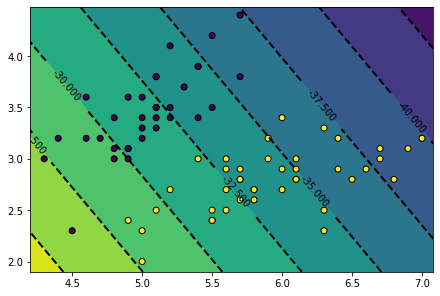

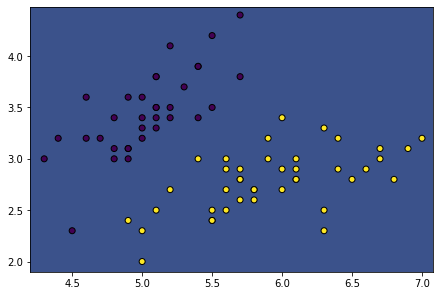

In [ ]:
# just throw in a random classifier to test visualisation
tmp_p = lambda X: X[:, 0] * w[0] + X[:, 1] * w[1] + w[2]
viz_hypo(tmp_p, lambda X:tmp_p(X) > 0, simple_X_train, simple_y_train)

## Search parameters in an infinite hypothesis family

Here we expand our tiny linear model into a Perceptron

In [ ]:
class MyPerceptron:
    def __init__(self):
        """
        The constructor method of an object.
        """
        self.h = np.array([0, 1, 0], dtype=np.float)


    def compute_linear_score_with_(self, X, h):
        """
        Compute the linear function
        s[i] = <h, X[i]> + bias, <., .> represents inner product
        """
        s = None
        # insert your code here
        # HINT: the *last* element in an array is represented as a[-1]
        s = (X * h[:-1]).sum(axis=1) + h[-1]
        return s

    def predict_with_(self, X, h):
        # return 0/1 according to the linear score
        return np.sign(self.compute_linear_score_with_(X, h)).astype(np.int)

    def predict(self, X):
        return self.predict_with_(X, self.h)

    def fit(self, X, y):
        """
        :param X: training samples -- observed attribute values
        :param y: the known answer for each sample

        NOTE: now the "loss" has been encoded. You can try a customised one!
        """
        # Follow the tutorial of perpectron training
        ii = 0
        while True:
            # insert your code here
            
            # predict using the current h
            predicted = self.predict_with_(X, self.h)
            # find errors
            error_indexes = np.nonzero(predicted != y)[0]
            # `nonzero` returns the indexes for multiple dimension array,
            # Here only the indexes of the first (and only) dimension is 
            # concerned, therefore the [0]

            if len(error_indexes) > 0:
                i = error_indexes[np.random.randint(len(error_indexes))]
                self.h[:-1] += X[i] * float(y[i])
                # To update the weights
                self.h[-1] += float(y[i])
                # To update the b-bias
                #   This is equivalent to using the homogeneous representation
                #   of x, where the last element is one
                print(f"{ii} Train errors: {len(error_indexes)}")
                ii += 1
                
                # DEBUG
                # print(predicted)
                # print(y)
                # if ii>400: 
                #     break
                # ii += 1
            else:
                break # All the predictions are correct on the training data 
                # and there is nothing to adjust.
            


In [ ]:
my_model = MyPerceptron() # initiate an object
my_model.fit(simple_X_train, simple_y_train)

In [ ]:
pred_valid = my_model.predict(simple_X_valid)
valid_corr_num = (pred_valid == simple_y_valid).sum()
print("Valid accu", valid_corr_num / len(simple_y_valid))

Let us visualise the trained perception model and its prediction on the training data:

In [ ]:
score_fn = lambda x:my_model.compute_linear_score_with_(x, my_model.h)
# The `lambda` defines an "anonymous function", which is a shortcut to write the 
# input-output correspondence without a formal definition
pred_fn = lambda x:my_model.predict(x)
viz_hypo(score_fn, pred_fn, simple_X_train, simple_y_train)

Further questions:

- Try to construct necessary logic branches in the loop of the training so that when the training data cannot be separated Completely by linear classifiers, the algorithm could exit gracely.
- Verify your implementation by trying to classify flowers of the second and the third classes.

# Array Ops

In [ ]:
import numpy as np
from sklearn.datasets import load_sample_images
ims = load_sample_images()
im0 = ims.images[0]

def show_array(a):
    if a.ndim == 1: 
        a = a[:, np.newaxis]
    fig, axes = plt.subplots(1)
    fig.set_size_inches(a.shape[1]/2, a.shape[0]/2)
    axes.imshow(a)
    axes.set_xticks(np.arange(a.shape[1]))
    axes.set_yticks(np.arange(a.shape[0]))

In [ ]:
a = np.zeros((10, 1))
a[5:8]=1
show_array(a)

a = np.zeros((10, 1))
a[3:8:2]=1
show_array(a)